<a href="https://colab.research.google.com/github/levyssouto/Python-codes/blob/main/Atividades_IA/Dataset_PROCON/Analise_Reclamacoes_Procon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #conecta Google colab ao Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pandas_profiling

In [ ]:
#!pip install sweetviz

In [ ]:
import pandas as pd #importa bibliotecas necessárias à Análise de Dados
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

#import sweetviz as sv
#from pandas_profiling import ProfileReport


# **ANÁLISE EXPLORATÓRIA**

In [ ]:
path = '/content/drive/MyDrive/Atividades_IA/base_arrumada.csv'

def inicia_dataset(path): #função para iniciar o dataset ou reiniciar caso necessário
  reclamacoes = pd.read_csv(path,sep=';',on_bad_lines='skip') #exclui badlines devido ao erro de tokenização
  return reclamacoes

reclamacoes=inicia_dataset(path) #inicia e reinicia dataset

<ipython-input-5-770adf7558f8>:4: DtypeWarning: Columns (8,10,13,16,18,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  reclamacoes = pd.read_csv(path,sep=';',on_bad_lines='skip') #exclui badlines devido ao erro de tokenização


In [ ]:
print("Formato do dataset: ",reclamacoes.shape)
reclamacoes.head()

Formato do dataset:  (113466, 25)


,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,Unnamed: 23,Unnamed: 24
0,2017,2017-03-14 15:17:52.000,2015-04-13 15:58:14.000,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,ASSURANT SEGURADORA S.A.,1,"3,8237E+12",...,S,122,Móveis Para Quarto,2338.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,75075560.0,NaN,NaN
1,2017,2017-03-14 15:17:52.000,2015-04-13 15:58:14.000,5,Centro-oeste,GO,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NOVO MUNDO,1,"1,53408E+12",...,S,122,Móveis Para Quarto,2338.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,75075560.0,NaN,NaN
2,2017,2017-03-03 14:00:12.000,2015-04-13 17:03:21.000,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,ASSURANT SEGURADORA S.A.,1,"3,8237E+12",...,S,92,Máquina de Lavar Roupa / Louça e Secadora,2493.0,Produto com vício,F,Nao Informada,75000000.0,NaN,NaN
3,2017,2017-03-03 14:00:12.000,2015-04-13 17:03:21.000,5,Centro-oeste,GO,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NOVO MUNDO,1,"1,53408E+12",...,S,92,Máquina de Lavar Roupa / Louça e Secadora,2493.0,Produto com vício,F,Nao Informada,75000000.0,NaN,NaN
4,2017,2017-12-12 14:40:31.000,2015-04-14 09:06:13.000,1,Norte,TO,BANCO BRADESCO FINANCIAMENTOS S.A.,BANCO BRADESCO FINANCIAMENTOS S.A.,1,"7,208E+12",...,N,53,Banco comercial,6915.0,Crédito Consignado,M,entre 51 a 60 anos,77970000.0,NaN,NaN


In [ ]:
#Verificar tipos de dados de cada coluna e a quantidade de valores não nulos
print("Tipos de dados das colunas: \n")
reclamacoes.info()

Tipos de dados das colunas: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113466 entries, 0 to 113465
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          113466 non-null  int64  
 1   DataArquivamento       113443 non-null  object 
 2   DataAbertura           113456 non-null  object 
 3   CodigoRegiao           113466 non-null  int64  
 4   Regiao                 113466 non-null  object 
 5   UF                     113466 non-null  object 
 6   strRazaoSocial         113463 non-null  object 
 7   strNomeFantasia        93722 non-null   object 
 8   Tipo                   113466 non-null  object 
 9   NumeroCNPJ             107333 non-null  object 
 10  RadicalCNPJ            107096 non-null  object 
 11  RazaoSocialRFB         97982 non-null   object 
 12  NomeFantasiaRFB        48016 non-null   object 
 13  CNAEPrincipal          97969 non-null   object 
 14  DescCN

In [ ]:
print("Quantidade de valores faltantes no Dataset: \n") # verifica valores NULL
reclamacoes.isna().sum() #Eliminar arquivamento, abertura, faixa etaria, codigo assunto

Quantidade de valores faltantes no Dataset: 



AnoCalendario                 0
DataArquivamento             23
DataAbertura                 10
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                3
strNomeFantasia           19744
Tipo                          0
NumeroCNPJ                 6133
RadicalCNPJ                6370
RazaoSocialRFB            15484
NomeFantasiaRFB           65450
CNAEPrincipal             15497
DescCNAEPrincipal         16036
Atendida                      0
CodigoAssunto                14
DescricaoAssunto             14
CodigoProblema            64830
DescricaoProblema         64854
SexoConsumidor               70
FaixaEtariaConsumidor        11
CEPConsumidor             11983
Unnamed: 23              113423
Unnamed: 24              113446
dtype: int64

### **ESTATÍSTICA DESCRITIVA E PREPARAÇÃO DE DADOS:**




In [ ]:
#Tirar colunas não necessárias á estatística descritiva
#excluir colunas com valores nominais
reclamacoes = inicia_dataset(path)
rec_estatistica = reclamacoes
rec_estatistica = rec_estatistica.sort_values('AnoCalendario')
remove_colunas = ["Tipo","CodigoProblema","strRazaoSocial","NumeroCNPJ","RadicalCNPJ","RazaoSocialRFB",
                  "NomeFantasiaRFB","CNAEPrincipal","DescCNAEPrincipal",
                  "CEPConsumidor","Unnamed: 23","Unnamed: 24"]
rec_estatistica.drop(remove_colunas,axis='columns',inplace=True)


<ipython-input-5-770adf7558f8>:4: DtypeWarning: Columns (8,10,13,16,18,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  reclamacoes = pd.read_csv(path,sep=';',on_bad_lines='skip') #exclui badlines devido ao erro de tokenização


In [ ]:
#CONVERTER CAMPOS DE DATA DE INT PARA CHAR E DE CHAR PARA DATETIME
rec_estatistica['DataAbertura'] = pd.to_datetime(rec_estatistica['DataAbertura']) #converte pra datetime
rec_estatistica['DataAbertura'] = rec_estatistica['DataAbertura'].dt.strftime('%Y-%m-%d') #converte de volta pra string
rec_estatistica['DataAbertura'] = pd.to_datetime(rec_estatistica['DataAbertura']) #converte pra datetime


rec_estatistica['DataArquivamento'] = pd.to_datetime(rec_estatistica['DataArquivamento'])
rec_estatistica['DataArquivamento'] = rec_estatistica['DataArquivamento'].dt.strftime('%Y-%m-%d')
rec_estatistica['DataArquivamento'] = pd.to_datetime(rec_estatistica['DataArquivamento'])

rec_estatistica.info() # DataArquivamento e DataAbertura foram convertidos para datetime64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113466 entries, 0 to 113465
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AnoCalendario          113466 non-null  int64         
 1   DataArquivamento       113443 non-null  datetime64[ns]
 2   DataAbertura           113456 non-null  datetime64[ns]
 3   CodigoRegiao           113466 non-null  int64         
 4   Regiao                 113466 non-null  object        
 5   UF                     113466 non-null  object        
 6   strNomeFantasia        93722 non-null   object        
 7   Atendida               113466 non-null  object        
 8   CodigoAssunto          113452 non-null  object        
 9   DescricaoAssunto       113452 non-null  object        
 10  DescricaoProblema      48612 non-null   object        
 11  SexoConsumidor         113396 non-null  object        
 12  FaixaEtariaConsumidor  113455 non-null  obje

In [ ]:
#Cria Análise do Dataset completo e deixa um arquivo .html na pasta para visualização
#profile = ProfileReport(rec_estatistica,title='Análise Exploratória')
#profile.to_file("rec_estatistica.html")

In [ ]:
#report_sv = sv.analyze(rec_estatistica)
#report_sv.show_html("sw.html")

In [ ]:
#empresa com mais reclamações: telefonia/vivo, problema mais recorrente: produto com vício, ano com mais reclamações: 2017
print("Tema com mais reclamações: ",rec_estatistica['DescricaoAssunto'].mode(),"\n")
print("Empresa com mais reclamações: ",rec_estatistica['strNomeFantasia'].mode(),"\n")
print("Problema mais recorrente: ",rec_estatistica['DescricaoProblema'].mode(),"\n")
print("Ano com mais reclamações: ",rec_estatistica['AnoCalendario'].mode(),"\n")

Tema com mais reclamações:  0    Telefone ( Convencional, Celular, Interfone, E...
Name: DescricaoAssunto, dtype: object 

Empresa com mais reclamações:  0    VIVO/TELEFÔNICA
Name: strNomeFantasia, dtype: object 

Problema mais recorrente:  0    Produto com vício
Name: DescricaoProblema, dtype: object 

Ano com mais reclamações:  0    2017
Name: AnoCalendario, dtype: int64 



array([[<Axes: title={'center': 'Atendida'}>]], dtype=object)

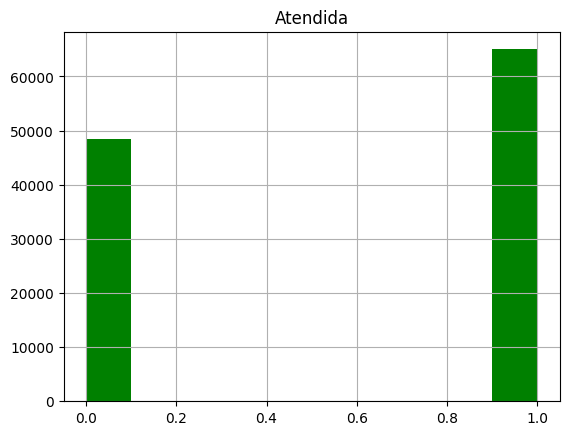

In [ ]:
rec_estatistica['Atendida'] = rec_estatistica['Atendida'].map({'S' : 1, 'N': 0}) #gráfico de quantidade de pessoas atendidas e não atendidas, mapeando sim 1 0 não
rec_estatistica.hist(column='Atendida',color='green')

**CATEGORIZANDO ATRIBUTOS NOMINAIS**

In [ ]:
#excluir colunas com valores nominais
remove_colunas_2 = ["strNomeFantasia","DescricaoAssunto","DescricaoProblema","Regiao"]
r_variavel=rec_estatistica
r_variavel.drop(remove_colunas_2,axis='columns',inplace=True) #remove colunas com atributos nominais

In [ ]:
#Categorizar estados uf, de 1 e 27
estados = ["BA","CE","ES","GO","MA","MG","MT","MS","PA","PB","PE","PI","PR","RJ","RN","RO","RS","SC","SP","TO"]
j=0
for i in estados:
  j+=1
  r_variavel["UF"].replace(to_replace=i,value=j,inplace=True)


r_variavel.tail()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor
107463,2021,2021-01-14,2020-12-07,5,7,1.0,264,F,Nao Informada
107464,2021,2021-04-28,2020-12-07,3,19,0.0,106,F,entre 51 a 60 anos
107465,2021,2021-12-08,2020-12-07,3,19,1.0,187,F,entre 51 a 60 anos
107459,2021,2021-04-28,2020-12-07,3,19,0.0,63,M,entre 61 a 70 anos
113465,2021,2021-12-29,2021-12-16,5,7,1.0,233,M,entre 41 a 50 anos


In [ ]:
r_variavel['Atendida'].replace(to_replace='S',value=1,inplace=True) # SIM 1
r_variavel['Atendida'].replace(to_replace='N',value=0,inplace=True) # NÃO 0

r_variavel['SexoConsumidor'].replace(to_replace='F',value=1,inplace=True) # FEMININO 1
r_variavel['SexoConsumidor'].replace(to_replace='M',value=0,inplace=True) # MASCULINO 0

idades = ["até 20 anos","entre 21 a 30 anos","entre 31 a 40 anos","entre 41 a 50 anos","entre 51 a 60 anos","entre 61 a 70 anos","mais de 70 anos"]
j=0
for i in idades:
  j+=1
  r_variavel["FaixaEtariaConsumidor"].replace(to_replace=i,value=j,inplace=True)

'''Classificação Faixa Etária
    0 : até 20 anos
    1 : entre 21 a 30 anos
    2 : entre 31 a 40 anos
    3 : entre 41 a 50 anos
    4 : entre 51 a 60 anos
    5 : entre 61 a 70 anos
    6 : mais de 70 anos
'''

r_variavel['Dias'] = (r_variavel['DataArquivamento'] - r_variavel['DataAbertura']).dt.days #calcula dias e cria uma nova coluna
r_variavel['Meses'] = r_variavel['Dias']//30



In [ ]:
'''CATEGORIZANDO CODIGO ASSUNTO:

#ALIMENTOS, BEBIDAS E DISTRIBUIDORAS = 1
#          FINANCAS,SEGURO E CRÉDITO = 2
#           MOBILARIA E CONSTRUTORA  = 3
#                    ARTIGOS DE CASA = 4
#             AUTOMOVEIS E AUTOPEÇAS = 5
#                 ARTIGOS PARA LAZER = 6
#                              SAUDE = 7
#                   ARTIGOS PESSOAIS = 8
#                           SERVIÇOS = 10
#                             OUTROS = 11
'''



categories = { # Cria categorias de assuntos por código
    'alimentos': list(range(1, 46)) + [50, 283],
    'financas': list(range(53, 76)) + [78, 79, 85, 86, 135, 144, 147, 229, 231, 280, 282],
    'mobiliaria': list(range(80, 85)) + [87],
    'domesticos': list(range(92, 99)) + list(range(100, 105)) + list(range(110, 113)) + list(range(120, 129)) + list(range(139, 144)) + [146],
    'auto': [99, 89, 129, 130, 131, 133, 145],
    'art_lazer': list(range(105, 110)) + list(range(245, 249)),
    'saude': [230, 284, 285, 286] + list(range(199, 225)),
    'art_pessoais': [132, 134, 287],
    'telecom': [136, 137, 186, 187, 188, 226, 227],
    'servicos': [281, 288] + list(range(156, 186)) + list(range(233, 245)) + list(range(249, 280)),
    'outros': [76, 77, 84, 88, 90, 91, 113, 114, 138]
}
i=0
for category, codes in categories.items():
    i+=1
    r_variavel['CodigoAssunto'].replace(to_replace=codes, value=i, inplace=True)


r_variavel.head()


,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Dias,Meses
0,2017,2017-03-14,2015-04-13,5,4,1.0,4,1,5,701.0,23.0
26534,2017,2017-11-14,2017-09-11,2,2,1.0,10,1,2,64.0,2.0
26535,2017,2017-12-14,2017-09-11,3,19,1.0,10,1,4,94.0,3.0
26536,2017,2017-10-18,2017-09-11,5,8,0.0,4,1,7,37.0,1.0
26537,2017,2017-12-06,2017-09-11,3,19,1.0,10,1,2,86.0,2.0


TRATANDO DADOS FALTANTES

In [ ]:
r_variavel.isna().sum() # conta a quantidade de valores
r_variavel.shape

(113466, 11)

In [ ]:
r_variavel.replace("NULL",np.nan,inplace=True)
r_variavel.replace("Nao Informada",np.nan,inplace=True)
r_variavel.replace(["Desistência de compra (cancelamento de compra)","Produto com vício",
                    "Contrato/pedido/orçamento (rescisão, descumprimento, erro, etc.)","Produto entregue incompleto",
                    "SAC - Cancelamento de serviço (retenção, demora, não envio do comprovante)","Cobrança indevida/abusiva"],np.nan,inplace=True)
r_variavel.dropna(inplace=True)

#substitui valores nulos e errados no Dataset por NaN e exclui os registros

r_variavel['Dias'] = r_variavel['Dias'].astype(int) #substitui float por int na coluna de qtd de dias

r_variavel.drop(["DataArquivamento","DataAbertura"],axis='columns',inplace=True) #remove datas de colunas

print("formato atual dataset, sem valores nulos")
print(r_variavel.shape)
r_variavel.info()

formato atual dataset, sem valores nulos
(103748, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103748 entries, 0 to 113465
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          103748 non-null  int64  
 1   CodigoRegiao           103748 non-null  int64  
 2   UF                     103748 non-null  int64  
 3   Atendida               103748 non-null  float64
 4   CodigoAssunto          103748 non-null  object 
 5   SexoConsumidor         103748 non-null  object 
 6   FaixaEtariaConsumidor  103748 non-null  object 
 7   Dias                   103748 non-null  int64  
 8   Meses                  103748 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.9+ MB


In [ ]:
r_variavel.head() # criar faixas de valores por dias a cada 180(semestre), classificar códigos do assunto

,AnoCalendario,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Dias,Meses
0,2017,5,4,1.0,4,1,5,701,23.0
26534,2017,2,2,1.0,10,1,2,64,2.0
26535,2017,3,19,1.0,10,1,4,94,3.0
26536,2017,5,8,0.0,4,1,7,37,1.0
26537,2017,3,19,1.0,10,1,2,86,2.0


CRIANDO CLASSES DE ASSUNTO E DE TEMPO

In [ ]:
dias = np.array(r_variavel['Dias'])

r_variavel['Semestres'] =  r_variavel['Dias'].apply(lambda x: math.ceil(x / 180) if (x % 180) > 90 else math.floor(x / 180))

r_variavel['Trimestres'] = r_variavel['Dias'].apply(lambda y: math.ceil(y / 90)if (y % 90) > 45 else math.floor(y / 90))

#cria colunas com número de semestres e trimestres baseados no dia
#usa list compreehension para percorrer valores de dias
#ao invés de varificar o resultado da divisão para arredondar, agor usamos operador % para verificar o resto, se maior que 90 arredonda pra cima, caso não
#arredonda pra baixo

In [ ]:
r_variavel.drop("Dias",axis=1,inplace=True) #tira coluna dos dias
''' CÓDIGO REGIÃO
1: Norte
2: Nordeste
3: Sudeste
4: Sul
5: Centro-Oeste
'''

colunas_para_int = ['Atendida', 'CodigoAssunto', 'Meses', 'FaixaEtariaConsumidor', 'SexoConsumidor']

r_variavel[colunas_para_int] = r_variavel[colunas_para_int].astype(int)

r_variavel.head()

,AnoCalendario,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Meses,Semestres,Trimestres
0,2017,5,4,1,4,1,5,23,4,8
26534,2017,2,2,1,10,1,2,2,0,1
26535,2017,3,19,1,10,1,4,3,1,1
26536,2017,5,8,0,4,1,7,1,0,0
26537,2017,3,19,1,10,1,2,2,0,1


Correlações

In [ ]:
r_variavel.corr().style.background_gradient(cmap='inferno') #mapa de correlação

,AnoCalendario,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Meses,Semestres,Trimestres
AnoCalendario,1.000000,0.035471,0.020599,-0.002583,0.424306,0.005168,0.063083,0.136408,0.136611,0.135080
CodigoRegiao,0.035471,1.000000,-0.517757,0.166623,-0.059163,-0.022455,-0.041332,0.235413,0.240163,0.241867
UF,0.020599,-0.517757,1.000000,-0.256859,0.166993,0.010004,0.053203,-0.235056,-0.218672,-0.230377
Atendida,-0.002583,0.166623,-0.256859,1.000000,-0.022131,0.012815,0.003609,0.032237,0.028887,0.032023
CodigoAssunto,0.424306,-0.059163,0.166993,-0.022131,1.000000,0.001409,-0.027038,0.006558,0.008530,0.006931
SexoConsumidor,0.005168,-0.022455,0.010004,0.012815,0.001409,1.000000,0.004127,-0.016521,-0.015436,-0.016673
FaixaEtariaConsumidor,0.063083,-0.041332,0.053203,0.003609,-0.027038,0.004127,1.000000,-0.044264,-0.041758,-0.044310
Meses,0.136408,0.235413,-0.235056,0.032237,0.006558,-0.016521,-0.044264,1.000000,0.981817,0.994726
Semestres,0.136611,0.240163,-0.218672,0.028887,0.008530,-0.015436,-0.041758,0.981817,1.000000,0.971785
Trimestres,0.135080,0.241867,-0.230377,0.032023,0.006931,-0.016673,-0.044310,0.994726,0.971785,1.000000


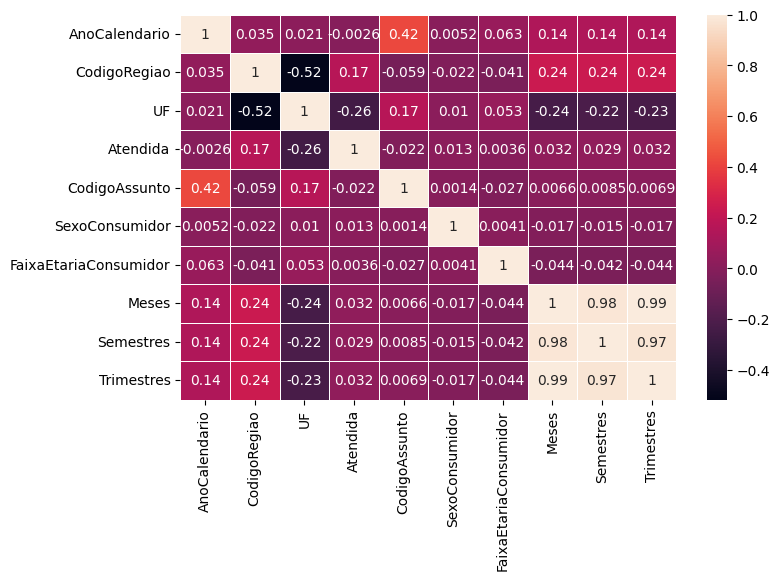

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
_=sns.heatmap(r_variavel.corr(),linewidth=0.4,annot=True)

# **TREINO E TESTE**

In [ ]:
r_treino = r_variavel #inicia nova variavel para treino e teste

In [ ]:
r_treino.describe().round(2)

,AnoCalendario,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Meses,Semestres,Trimestres
count,103748.00,103748.00,103748.00,103748.00,103748.00,103748.00,103748.00,103748.00,103748.00,103748.00
mean,2018.16,3.31,12.77,0.58,98.98,0.53,3.99,5.31,0.91,1.89
std,1.20,1.19,6.25,0.49,84.16,0.50,1.56,9.28,1.62,3.13
min,2017.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,2017.00,3.00,6.00,0.00,10.00,0.00,3.00,1.00,0.00,1.00
50%,2018.00,3.00,15.00,1.00,88.00,1.00,4.00,3.00,0.00,1.00
75%,2019.00,5.00,19.00,1.00,183.00,1.00,5.00,5.00,1.00,2.00
max,2021.00,5.00,20.00,1.00,288.00,1.00,7.00,145.00,24.00,49.00


In [ ]:
anos = [2017,2018,2019,2020,2021]
j=0
for i in anos:
  j+=1
  r_treino["AnoCalendario"].replace(to_replace=i,value=j,inplace=True)
r_treino.head()

,AnoCalendario,CodigoRegiao,UF,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Meses,Semestres,Trimestres
0,1,5,4,1,4,1,5,23,4,8
26534,1,2,2,1,10,1,2,2,0,1
26535,1,3,19,1,10,1,4,3,1,1
26536,1,5,8,0,4,1,7,1,0,0
26537,1,3,19,1,10,1,2,2,0,1


ÁRVORES DE DECISÃO

In [ ]:
#features de treino = demais atributos
#rótulos =  Atendida

y = r_treino['Atendida']
r_treino.drop(['Atendida'],axis=1,inplace=True)
X = r_treino

y = np.array(y)
X = np.array(X)

In [ ]:
r_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103748 entries, 0 to 113465
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   AnoCalendario          103748 non-null  int64
 1   CodigoRegiao           103748 non-null  int64
 2   UF                     103748 non-null  int64
 3   CodigoAssunto          103748 non-null  int64
 4   SexoConsumidor         103748 non-null  int64
 5   FaixaEtariaConsumidor  103748 non-null  int64
 6   Meses                  103748 non-null  int64
 7   Semestres              103748 non-null  int64
 8   Trimestres             103748 non-null  int64
dtypes: int64(9)
memory usage: 7.9 MB


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#separa dados para treino e teste conforme porcentagem em test_size e define um estado aleatório para dataset
#X é o dataset com as features para treino e y a variável com rótulos 1 ou 0
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, test_size=0.2,
                                                    random_state=42)

#modelo #arvore
arvore = DecisionTreeClassifier(max_depth=100,random_state=10) # variavel para modelo de arvore
modelo_arvore = arvore.fit(X_train, y_train) #variáveis de treino como parâmetro para modelo
predicao_arvore = modelo_arvore.predict(X_test) #guarda valores previstos em features de teste
predicao_arvore[0:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

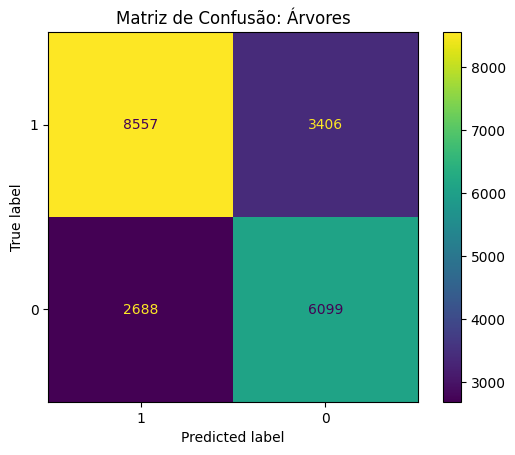

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelo_arvore, X_test, y_test, labels=[1,0])
plt.title("Matriz de Confusão: Árvores")
plt.show()

In [ ]:
#mostra acurácia e taxa de acerto (score)
from sklearn.metrics import classification_report,accuracy_score
acuracia_atendimentos = accuracy_score(predicao_arvore, y_test) * 100

#relatório de classificação onde compara y_test (labels verdadeiras) e as predições realizadas, calcula métricas de avaliação
print(classification_report(y_test, predicao_arvore))

print("Taxa de Acerto é de %d%%" %acuracia_atendimentos)


              precision    recall  f1-score   support

           0       0.64      0.69      0.67      8787
           1       0.76      0.72      0.74     11963

    accuracy                           0.71     20750
   macro avg       0.70      0.70      0.70     20750
weighted avg       0.71      0.71      0.71     20750

Taxa de Acerto é de 70%


XGB

In [ ]:
from xgboost import XGBClassifier
modelo_xgb = XGBClassifier(n_estimators=100,learning_rate = 0.2, n_jobs = 4)
modelo_xgb.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)], verbose = False)
y_pred = modelo_xgb.predict(X_test)


print(classification_report(y_test, y_pred))
acuracia_xgb = accuracy_score(y_test,y_pred)*100
print("Taxa de acerto de %d%%" %acuracia_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.67      0.62      0.64      8787
           1       0.74      0.78      0.76     11963

    accuracy                           0.71     20750
   macro avg       0.70      0.70      0.70     20750
weighted avg       0.71      0.71      0.71     20750

Taxa de acerto de 71%


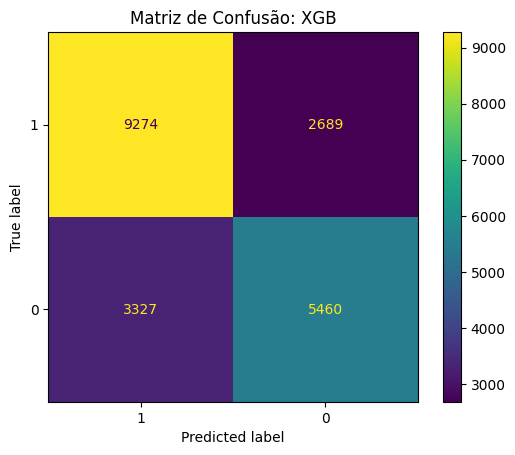

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelo_xgb, X_test, y_test, labels=[1,0])
plt.title("Matriz de Confusão: XGB")
plt.show()

REGRESSÃO LOGÍSTICA

In [ ]:
#regressão logística
from sklearn.linear_model import LogisticRegression
regr_logistica = LogisticRegression() #treina modelo de regressao logistica
regr_logistica.fit(X_train, y_train)
y_pred_rl = regr_logistica.predict(X_test)

#taxas
print(classification_report(y_test, y_pred_rl))
score_rl = regr_logistica.score(X_test,y_test) *100
print("Taxa de Acerto é de %d%%" %score_rl)

              precision    recall  f1-score   support

           0       0.56      0.62      0.58      8787
           1       0.69      0.64      0.67     11963

    accuracy                           0.63     20750
   macro avg       0.63      0.63      0.63     20750
weighted avg       0.64      0.63      0.63     20750

Taxa de Acerto é de 63%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


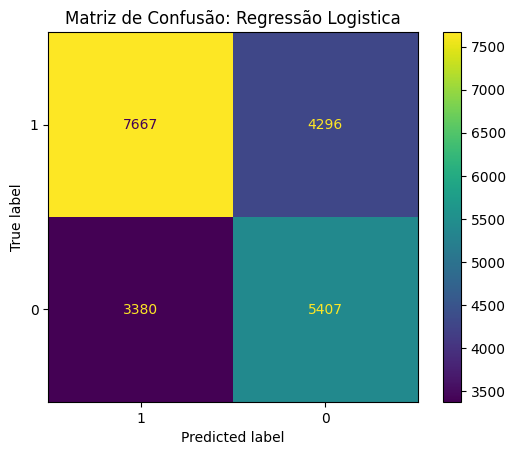

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(regr_logistica, X_test, y_test, labels=[1,0])
plt.title("Matriz de Confusão: Regressão Logistica")
plt.show()

PERCEPTRON


In [ ]:
from sklearn.linear_model import Perceptron
# Criar e treinar o Perceptron
perceptron = Perceptron(random_state=101)
perceptron.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = perceptron.predict(X_test)

# Calcular a acurácia das previsões
acuracia_perceptron = accuracy_score(y_test, y_pred) * 100
print("Taxa de Acerto é de %d%%" %acuracia_perceptron)

Taxa de Acerto é de 61%


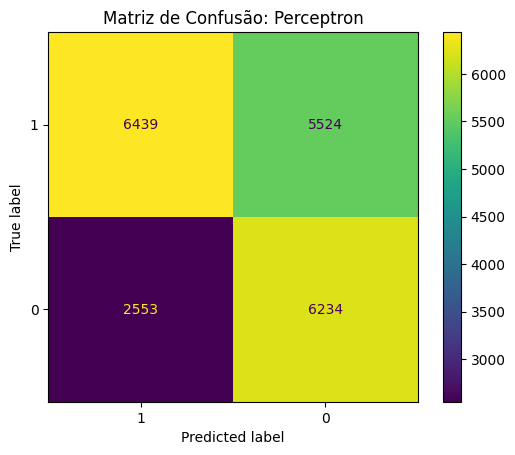

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(perceptron, X_test, y_test, labels=[1,0])
plt.title("Matriz de Confusão: Perceptron")
plt.show()

FEED FORWARD

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Normalizar dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


feedf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


feedf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


feedf.fit(X_train, y_train)

_,acuracia_feedf = feedf.evaluate(X_test, y_test)
print('Taxa de acerto: {:.2f}%'.format(acuracia_feedf * 100))

649/649 [==============================] - 3s 4ms/step - loss: 0.6196 - accuracy: 0.6493
Taxa de acerto: 64.93%
